In [7]:
# Question 1

import cv2 as cv 
import matplotlib.pyplot as plt 

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

In [8]:
im.shape

(360, 360, 3)

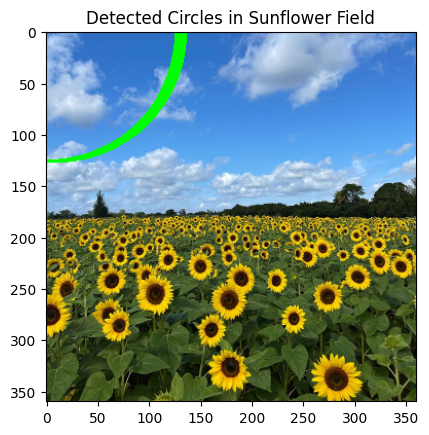

Top 10 Largest Circles: (X, Y, Radius)
(1, 1, 125.70944355934442)
(2, 1, 125.70944355934442)
(3, 1, 125.70944355934442)
(4, 1, 125.70944355934442)
(5, 1, 125.70944355934442)
(6, 1, 125.70944355934442)
(7, 1, 125.70944355934442)
(8, 1, 125.70944355934442)
(9, 1, 125.70944355934442)
(10, 1, 125.70944355934442)
Sigma range used: 0.01 to 100.0


In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Parameters
sigma_values = np.linspace(start=0.01, stop=100, num=10)  # Range of σ values, can be adjusted
k = 1.414  # Scale multiplier for σ

# Create scale-space and detect blobs
scale_space = []
for sigma in sigma_values:
    # Apply GaussianBlur and compute LoG
    blurred = cv.GaussianBlur(im_gray, (0, 0), sigma)
    plt.imshow()
    log_image = cv.Laplacian(blurred, cv.CV_64F, ksize=3)
    
    # Normalize the LoG response for each sigma
    log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())
    
    # Add to scale-space
    scale_space.append(log_image)

# Convert to 3D array
scale_space = np.stack(scale_space, axis=-1)

# Non-maximum suppression across scales and space
blobs = np.zeros_like(scale_space)
for z in range(1, len(sigma_values)-1):
    for x in range(1, scale_space.shape[0]-1):
        for y in range(1, scale_space.shape[1]-1):
            # Neighborhood comparison (3D neighborhood)
            neighborhood = scale_space[x-1:x+2, y-1:y+2, z-1:z+2]
            if scale_space[x, y, z] == np.max(neighborhood):
                blobs[x, y, z] = scale_space[x, y, z]

# Extract circle parameters (center and radius)
circle_params = []
for z, sigma in enumerate(sigma_values):
    # Threshold to extract significant blobs
    blob_threshold = blobs[:, :, z] > 0.1  # Example threshold
    ys, xs = np.where(blob_threshold)
    radii = sigma * np.sqrt(2)  # Radius related to sigma
    for x, y in zip(xs, ys):
        circle_params.append((x, y, radii))

# Sort circles by radius (largest first)
circle_params = sorted(circle_params, key=lambda x: x[2], reverse=True)

# Draw largest circles on the image
output_image = im.copy()
for (x, y, radius) in circle_params[:10]:  # Drawing top 10 largest
    cv.circle(output_image, (x, y), int(radius), (0, 255, 0), 2)

# Display the image with drawn circles
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Detected Circles in Sunflower Field')
plt.show()

# Report the parameters of the largest circles
largest_circles = circle_params[:10]
print("Top 10 Largest Circles: (X, Y, Radius)")
for circle in largest_circles:
    print(circle)

# Report the range of sigma values used
print(f"Sigma range used: {sigma_values[0]} to {sigma_values[-1]}")

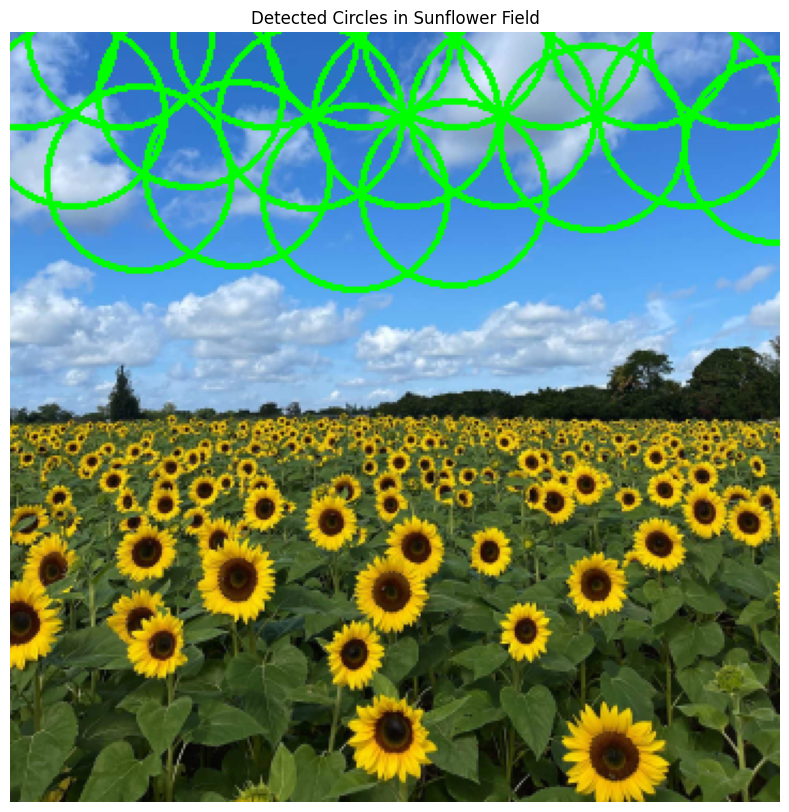


Detected Circles: (X, Y, Radius)
X: 6, Y: 1, Radius: 43.03
X: 51, Y: 1, Radius: 43.03
X: 119, Y: 1, Radius: 43.03
X: 163, Y: 1, Radius: 43.03
X: 208, Y: 1, Radius: 43.03
X: 252, Y: 1, Radius: 43.03
X: 296, Y: 1, Radius: 43.03
X: 341, Y: 1, Radius: 43.03
X: 84, Y: 29, Radius: 43.03
X: 29, Y: 38, Radius: 43.03
X: 185, Y: 38, Radius: 43.03
X: 230, Y: 38, Radius: 43.03
X: 318, Y: 38, Radius: 43.03
X: 140, Y: 39, Radius: 43.03
X: 272, Y: 49, Radius: 43.03
X: 358, Y: 55, Radius: 43.03
X: 106, Y: 66, Radius: 43.03
X: 60, Y: 68, Radius: 43.03
X: 207, Y: 75, Radius: 43.03
X: 161, Y: 77, Radius: 43.03

Sigma range used: 5.00 to 30.00


In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv.imread("the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)

# Check if image was loaded successfully
if im is None:
    raise ValueError("Failed to load image. Please check the file name and try again.")

# Convert to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Parameters - adjusted for sunflower size
sigma_values = np.linspace(start=5, stop=30, num=20)  # Adjusted sigma range
k = 1.414  # Scale multiplier for σ

# Create scale-space and detect blobs
scale_space = []
for sigma in sigma_values:
    # Apply GaussianBlur and compute LoG
    ksize = int(2 * np.ceil(3 * sigma) + 1)
    ksize = max(3, ksize)
    blurred = cv.GaussianBlur(im_gray, (ksize, ksize), sigma)
    log_image = cv.Laplacian(blurred, cv.CV_64F, ksize=3)
    
    # Normalize the LoG response for each sigma
    log_image = np.abs(log_image)  # Take absolute value of Laplacian
    log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())
    
    # Add to scale-space
    scale_space.append(log_image)

# Convert to 3D array
scale_space = np.stack(scale_space, axis=-1)

# Non-maximum suppression across scales and space
blobs = np.zeros_like(scale_space)
for z in range(1, len(sigma_values)-1):
    for x in range(1, scale_space.shape[0]-1):
        for y in range(1, scale_space.shape[1]-1):
            # Neighborhood comparison (3D neighborhood)
            neighborhood = scale_space[x-1:x+2, y-1:y+2, z-1:z+2]
            if scale_space[x, y, z] == np.max(neighborhood):
                blobs[x, y, z] = scale_space[x, y, z]

# Extract circle parameters (center and radius)
circle_params = []
for z, sigma in enumerate(sigma_values):
    # Adjusted threshold for better detection
    blob_threshold = blobs[:, :, z] > 0.3  # Increased threshold
    ys, xs = np.where(blob_threshold)
    radii = sigma * 1.5  # Adjusted radius multiplier
    for x, y in zip(xs, ys):
        circle_params.append((x, y, radii))

# Sort circles by radius (largest first)
circle_params = sorted(circle_params, key=lambda x: x[2], reverse=True)

# Remove overlapping circles
def overlap(c1, c2, threshold=0.5):
    x1, y1, r1 = c1
    x2, y2, r2 = c2
    distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance < (r1 + r2) * threshold

filtered_circles = []
for circle in circle_params:
    if not any(overlap(circle, c) for c in filtered_circles):
        filtered_circles.append(circle)

# Draw circles on the image
output_image = im.copy()
for (x, y, radius) in filtered_circles[:20]:  # Increased number of circles to show
    cv.circle(output_image, (x, y), int(radius), (0, 255, 0), 2)

# Display the image with drawn circles
plt.figure(figsize=(15, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Detected Circles in Sunflower Field')
plt.axis('off')
plt.show()

# Report the parameters of the largest circles
print("\nDetected Circles: (X, Y, Radius)")
for circle in filtered_circles[:20]:
    print(f"X: {circle[0]}, Y: {circle[1]}, Radius: {circle[2]:.2f}")

# Report the range of sigma values used
print(f"\nSigma range used: {sigma_values[0]:.2f} to {sigma_values[-1]:.2f}")

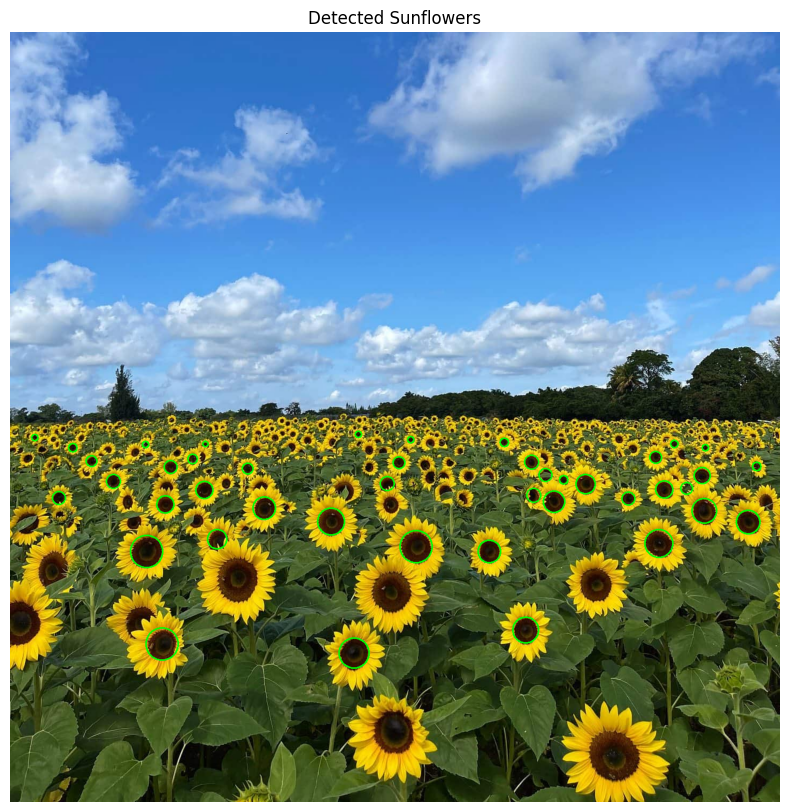

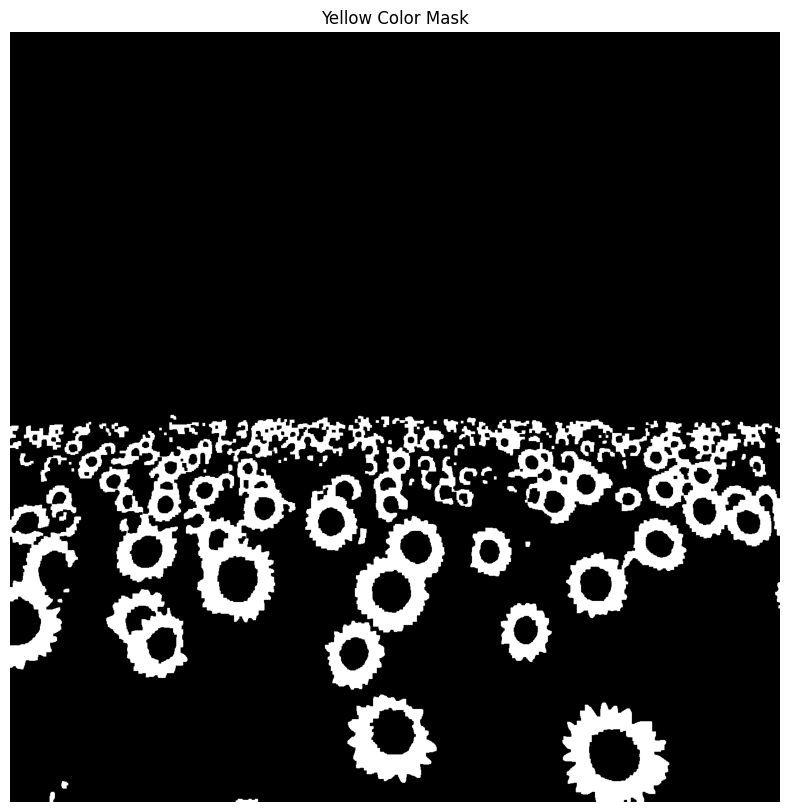


Number of sunflowers detected: 43

Sunflower locations (x, y) and sizes:
Sunflower 1: Position (x=643, y=1161), Size=57
Sunflower 2: Position (x=284, y=1144), Size=60
Sunflower 3: Position (x=964, y=1118), Size=48
Sunflower 4: Position (x=896, y=971), Size=42
Sunflower 5: Position (x=255, y=971), Size=60
Sunflower 6: Position (x=759, y=962), Size=60
Sunflower 7: Position (x=1213, y=956), Size=52
Sunflower 8: Position (x=387, y=948), Size=37
Sunflower 9: Position (x=1380, y=916), Size=45
Sunflower 10: Position (x=600, y=915), Size=51
Sunflower 11: Position (x=1298, y=895), Size=47
Sunflower 12: Position (x=475, y=890), Size=42
Sunflower 13: Position (x=290, y=883), Size=32
Sunflower 14: Position (x=1156, y=872), Size=24
Sunflower 15: Position (x=91, y=871), Size=25
Sunflower 16: Position (x=1017, y=878), Size=41
Sunflower 17: Position (x=979, y=866), Size=26
Sunflower 18: Position (x=1265, y=853), Size=22
Sunflower 19: Position (x=363, y=856), Size=32
Sunflower 20: Position (x=1223, y=

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv.imread("the_berry_farms_sunflower_field.jpeg")

# Check if image was loaded successfully
if im is None:
    raise ValueError("Failed to load image. Please check the file name and try again.")

# Convert to HSV color space
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

# Define yellow color range for sunflowers
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Apply morphological operations to clean up the mask
kernel = np.ones((5,5), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

# Setup SimpleBlobDetector parameters
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area
params.filterByArea = True
params.minArea = 100
params.maxArea = 3000

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.6

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.6

# Filter by Inertia (how circular the blob is)
params.filterByInertia = True
params.minInertiaRatio = 0.5

# Create blob detector
detector = cv.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(mask)

# Draw detected blobs as circles
output_image = im.copy()
for keypoint in keypoints:
    x = int(keypoint.pt[0])
    y = int(keypoint.pt[1])
    r = int(keypoint.size / 2)
    cv.circle(output_image, (x, y), r, (0, 255, 0), 2)

# Display the image with drawn circles
plt.figure(figsize=(15, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Detected Sunflowers')
plt.axis('off')
plt.show()

# Display the mask for debugging
plt.figure(figsize=(15, 10))
plt.imshow(mask, cmap='gray')
plt.title('Yellow Color Mask')
plt.axis('off')
plt.show()

# Report the number of sunflowers detected
print(f"\nNumber of sunflowers detected: {len(keypoints)}")
print("\nSunflower locations (x, y) and sizes:")
for idx, keypoint in enumerate(keypoints, 1):
    print(f"Sunflower {idx}: Position (x={int(keypoint.pt[0])}, y={int(keypoint.pt[1])}), Size={int(keypoint.size)}")

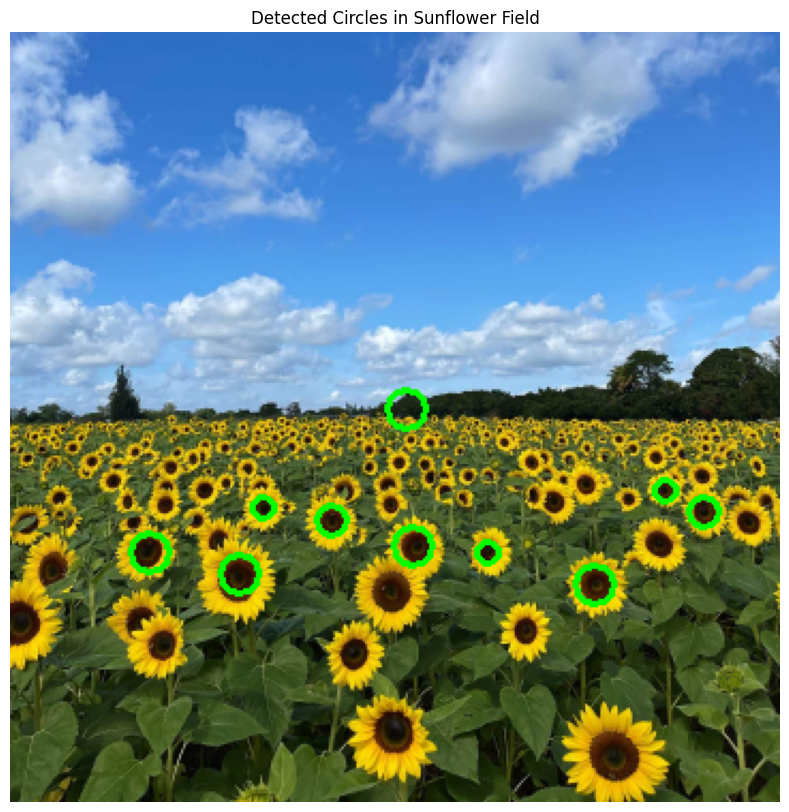


Top 10 Largest Circles: (X, Y, Radius, Strength)
Circle 1: X: 306, Y: 214, Radius: 5.86, Strength: 1.000
Circle 2: X: 118, Y: 222, Radius: 5.86, Strength: 1.000
Circle 3: X: 223, Y: 243, Radius: 5.86, Strength: 1.000
Circle 4: X: 324, Y: 224, Radius: 7.71, Strength: 1.000
Circle 5: X: 150, Y: 228, Radius: 7.71, Strength: 1.000
Circle 6: X: 185, Y: 176, Radius: 9.57, Strength: 1.000
Circle 7: X: 188, Y: 240, Radius: 9.57, Strength: 1.000
Circle 8: X: 65, Y: 243, Radius: 9.57, Strength: 1.000
Circle 9: X: 107, Y: 253, Radius: 9.57, Strength: 1.000
Circle 10: X: 273, Y: 258, Radius: 9.57, Strength: 1.000

Sigma range used: 2.00 to 15.00


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Check if image was loaded successfully
if im is None:
    raise ValueError("Failed to load image. Please check the file name and try again.")

# Convert to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Parameters for LoG blob detection
sigma_values = np.linspace(start=2, stop=15, num=15)  # Range of σ values
k = 1.414  # Scale multiplier for σ

# Create scale-space and detect blobs
scale_space = []
for sigma in sigma_values:
    # Apply GaussianBlur and compute LoG
    ksize = int(2 * np.ceil(3 * sigma) + 1)
    ksize = max(3, ksize if ksize % 2 == 1 else ksize + 1)  # Ensure odd kernel size
    
    # Gaussian blur
    blurred = cv.GaussianBlur(im_gray, (ksize, ksize), sigma)
    
    # Laplacian
    log_image = cv.Laplacian(blurred, cv.CV_64F)
    
    # Normalize and square the LoG response (to enhance blob detection)
    log_image = np.square(log_image)
    log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())
    
    scale_space.append(log_image)

# Convert to 3D array
scale_space = np.stack(scale_space, axis=-1)

# Non-maximum suppression across scales and space
blobs = np.zeros_like(scale_space)
for z in range(1, len(sigma_values)-1):
    for x in range(1, scale_space.shape[0]-1):
        for y in range(1, scale_space.shape[1]-1):
            # Get 3x3x3 neighborhood
            neighborhood = scale_space[x-1:x+2, y-1:y+2, z-1:z+2]
            # Check if center pixel is maximum in its neighborhood
            if scale_space[x, y, z] == np.max(neighborhood) and scale_space[x, y, z] > 0.2:
                blobs[x, y, z] = scale_space[x, y, z]

# Extract circle parameters
circle_params = []
for z, sigma in enumerate(sigma_values):
    coords = np.where(blobs[:, :, z] > 0)
    for x, y in zip(*coords):
        # Radius is proportional to sigma
        radius = sigma * 2  # Multiplier adjusted for sunflower size
        circle_params.append((x, y, radius, blobs[x, y, z]))  # Include blob strength

# Sort circles by blob strength (strongest responses first)
circle_params = sorted(circle_params, key=lambda x: x[3], reverse=True)

# Remove overlapping circles
def overlap(c1, c2, threshold=0.5):
    x1, y1, r1, _ = c1
    x2, y2, r2, _ = c2
    distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance < (r1 + r2) * threshold

filtered_circles = []
for circle in circle_params:
    if not any(overlap(circle, c) for c in filtered_circles):
        filtered_circles.append(circle)

# Draw circles on the image
output_image = im.copy()
for (x, y, radius, strength) in filtered_circles[:10]:  # Draw top 10 strongest circles
    cv.circle(output_image, (int(y), int(x)), int(radius), (0, 255, 0), 2)

# Display the image with drawn circles
plt.figure(figsize=(15, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Detected Circles in Sunflower Field')
plt.axis('off')
plt.show()

# Report the parameters of the largest circles
print("\nTop 10 Largest Circles: (X, Y, Radius, Strength)")
for i, (x, y, radius, strength) in enumerate(filtered_circles[:10], 1):
    print(f"Circle {i}: X: {int(y)}, Y: {int(x)}, Radius: {radius:.2f}, Strength: {strength:.3f}")

# Report the range of sigma values used
print(f"\nSigma range used: {sigma_values[0]:.2f} to {sigma_values[-1]:.2f}")

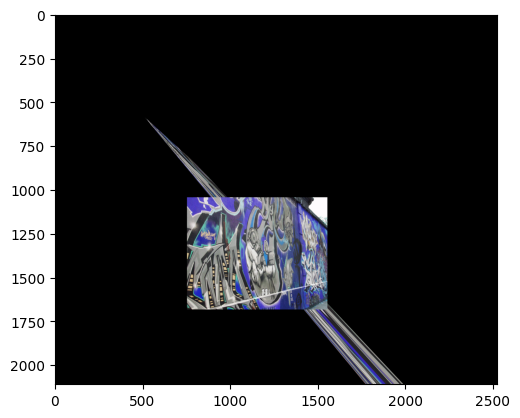

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def load_images(img1_path, img5_path):
    """Load and convert images to grayscale"""
    img1 = cv2.imread(img1_path)
    img5 = cv2.imread(img5_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
    return img1, img5, gray1, gray5

def compute_sift_matches(img1, img2):
    """Compute SIFT features and matches between two images"""
    # Initialize SIFT detector
    sift = cv2.SIFT_create()
    
    # Find keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    # FLANN parameters for matching
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    
    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    
    return kp1, kp2, good_matches

def compute_homography_ransac(kp1, kp2, matches, threshold=4.0, max_iterations=2000):
    """Compute homography matrix using RANSAC"""
    if len(matches) < 4:
        return None
    
    # Convert keypoints to numpy arrays
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    
    best_H = None
    best_inliers = []
    max_inliers = 0
    
    for _ in range(max_iterations):
        # Randomly select 4 matches
        idx = np.random.choice(len(matches), 4, replace=False)
        src_sample = src_pts[idx]
        dst_sample = dst_pts[idx]
        
        try:
            H = cv2.getPerspectiveTransform(src_sample, dst_sample)
            
            # Transform all points
            transformed_pts = cv2.perspectiveTransform(src_pts, H)
            
            # Calculate distances
            distances = np.sqrt(np.sum((dst_pts - transformed_pts) ** 2, axis=2)).reshape(-1)
            
            # Count inliers
            inliers = distances < threshold
            num_inliers = np.sum(inliers)
            
            if num_inliers > max_inliers:
                max_inliers = num_inliers
                best_inliers = inliers
                best_H = H
        
        except:
            continue
    
    if best_H is None:
        return None
    
    # Refine homography using all inliers
    if np.sum(best_inliers) > 4:
        src_inliers = src_pts[best_inliers].reshape(-1, 1, 2)
        dst_inliers = dst_pts[best_inliers].reshape(-1, 1, 2)
        best_H, _ = cv2.findHomography(src_inliers, dst_inliers, cv2.RANSAC)
    
    return best_H

def stitch_images(img1, img5, H):
    """Stitch img1 onto img5 using homography matrix H"""
    # Get dimensions
    h1, w1 = img1.shape[:2]
    h5, w5 = img5.shape[:2]
    
    # Create points for corners of img1
    corners = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    
    # Transform corners
    transformed_corners = cv2.perspectiveTransform(corners, H)
    
    # Get bounds
    min_x = min(np.min(transformed_corners[:, :, 0]), 0)
    max_x = max(np.max(transformed_corners[:, :, 0]), w5)
    min_y = min(np.min(transformed_corners[:, :, 1]), 0)
    max_y = max(np.max(transformed_corners[:, :, 1]), h5)
    
    # Translation matrix to shift to positive coordinates
    translation = np.array([
        [1, 0, -min_x],
        [0, 1, -min_y],
        [0, 0, 1]
    ])
    
    # Combine transformation matrices
    H_final = translation.dot(H)
    
    # Create output image
    output_shape = (int(max_y - min_y), int(max_x - min_x))
    output = cv2.warpPerspective(img1, H_final, output_shape)
    
    # Copy img5 into output
    y_offset = int(-min_y)
    x_offset = int(-min_x)
    output[y_offset:y_offset + h5, x_offset:x_offset + w5] = img5
    
    return output

def main(img1_path, img5_path, gt_homography=None):

    """Main function to perform image stitching"""

    img1_path = "graf/img1.ppm"
    img2_path = "graf/img2.ppm"
    img5_path = "graf/img5.ppm"
    # Load images
    img1, img5, gray1, gray5 = load_images(img1_path, img5_path)
    
    # Compute SIFT matches
    kp1, kp2, matches = compute_sift_matches(gray1, gray5)
    
    # Compute homography using RANSAC
    H = compute_homography_ransac(kp1, kp2, matches)
    
    if H is not None:
        # Compare with ground truth homography if provided
        if gt_homography is not None:
            error = np.linalg.norm(H - gt_homography)
            print(f"Homography error compared to ground truth: {error}")
        
        # Stitch images
        result = stitch_images(img1, img5, H)
        
        return result
    else:
        print("Failed to compute homography")
        return None
    
result = main('graf/img1.ppm', 'graf/img5.ppm')
plt.imshow(result)
# cv2.imwrite('q4_stitched_result.jpg', result)